# **Heart attack prediction project**
# Amirali Shahriary

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm

%matplotlib inline

In [163]:
#data = pd.read_csv("heart.csv")
data = pd.read_csv('/home/amirali/Downloads/heart.csv') 
data[0:5]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [164]:
data.shape

(303, 14)

In [165]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [166]:
data.info()
#as you can see all the datas are int type except oldpeak.
# there is no missing or broken values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [167]:
# convert everything numerical
X = [
    "age",
    "1: male, 0: female",
    "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
    "resting blood pressure",
    "serum cholestoral in mg/dl",
    "fasting blood sugar > 120 mg/dl",
    "resting electrocardiographic results (values 0,1,2)",
    "maximum heart rate achieved",
    "exercise-induced angina",
    "oldpeak = ST depression induced by exercise relative to rest",
    "the slope of the peak exercise ST segment",
    "number of major vessels (0-3) colored by fluoroscopy",
    "thal: 3 = normal; 6 = fixed defect; 7 = reversible defect"
]

X[0:13]

['age',
 '1: male, 0: female',
 'chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic',
 'resting blood pressure',
 'serum cholestoral in mg/dl',
 'fasting blood sugar > 120 mg/dl',
 'resting electrocardiographic results (values 0,1,2)',
 'maximum heart rate achieved',
 'exercise-induced angina',
 'oldpeak = ST depression induced by exercise relative to rest',
 'the slope of the peak exercise ST segment',
 'number of major vessels (0-3) colored by fluoroscopy',
 'thal: 3 = normal; 6 = fixed defect; 7 = reversible defect']

In [168]:
Y=data["output"]
Y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [169]:
data["output"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: output, dtype: float64

In [170]:
# correlation & normalizing
print(data.corr()["output"].abs().sort_values(ascending=False))

output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


# Analyse values

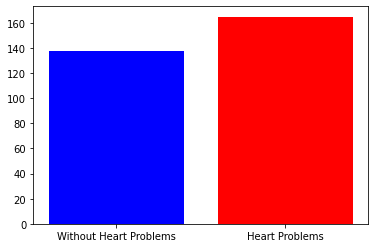

1    165
0    138
Name: output, dtype: int64
Percentage of heart problems: 45.54
Percentage of healthy heart: 54.46


In [171]:
import matplotlib.pyplot as plt

# Create a count plot with different colors for heart problems and without heart problems
plt.bar(Y.unique(), Y.value_counts(), color=['red', 'blue'])

plt.xticks(Y.unique(), ['Heart Problems', 'Without Heart Problems'])
plt.show()

# Calculate the counts and percentages 
target_temp = Y.value_counts()
total_patients = len(Y)
percentage_with_heart_problems = (target_temp[1] * 100) / total_patients
percentage_without_heart_problems = (target_temp[0] * 100) / total_patients

print(target_temp)
print("Percentage of heart problems: " + str(round(percentage_without_heart_problems, 2)))
print("Percentage of healthy heart: " + str(round(percentage_with_heart_problems, 2)))


Now we start no analyse one by one of our X:

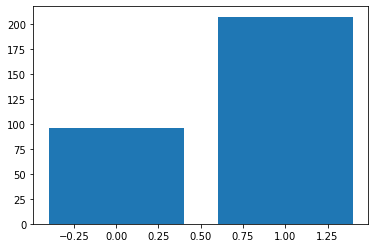

In [172]:
# Now do that for the sex factor
# Get the unique values of the "sex" column
unique_sexes = data["sex"].unique()
counts = []
for sex in unique_sexes:
  count = len(data[data["sex"] == sex])
  counts.append(count)

plt.bar(unique_sexes, counts)
plt.show()


so what we can see  chance to have heart problem between man and woman .

/home/amirali/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


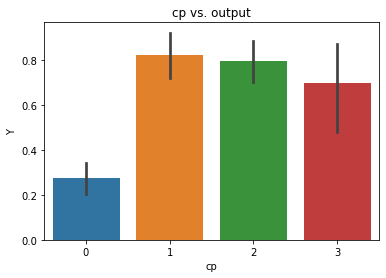

In [173]:
# now we do same thing for CP factor 
sns.barplot(data["cp"], Y)
plt.title("cp vs. output")
plt.xlabel("cp")
plt.ylabel("Y")
plt.show()

we can see the difference between people of each group via plt and find out people with 0 cp has less chance

/home/amirali/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


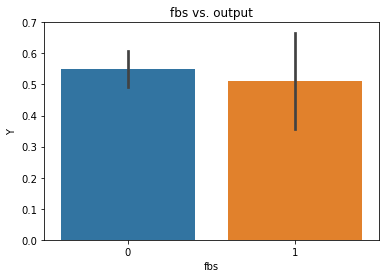

In [174]:
sns.barplot(data["fbs"], Y)
plt.title("fbs vs. output")
plt.xlabel("fbs")
plt.ylabel("Y")
plt.show()

there was no terrific data here that can help us .

/home/amirali/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


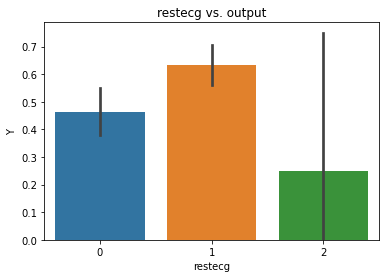

In [175]:
#Restecg factor
sns.barplot(data["restecg"], Y)
plt.title("restecg vs. output")
plt.xlabel("restecg")
plt.ylabel("Y")
plt.show()

 people with restecg 1 and 0 are much more likely to have a heart disease than with restecg 2 and these people are more in safe zone.

/home/amirali/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


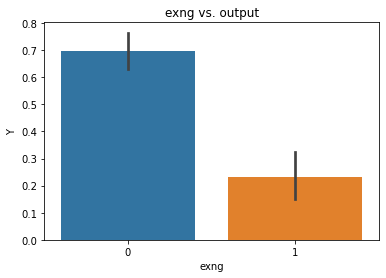

In [176]:
#Exng factor
sns.barplot(data["exng"], Y)
plt.title("exng vs. output")
plt.xlabel("exng")
plt.ylabel("Y")
plt.show()

people with exng =0 are more likely to face heart attack.

/home/amirali/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


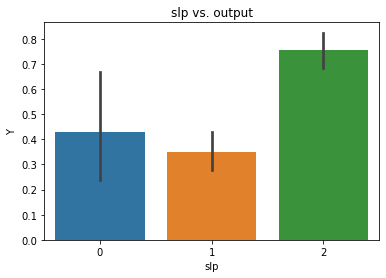

In [177]:
#Slp factor
sns.barplot(data["slp"], Y)
plt.title("slp vs. output")
plt.xlabel("slp")
plt.ylabel("Y")
plt.show()

people with slp=2 are more in risk to face hart attack.

/home/amirali/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


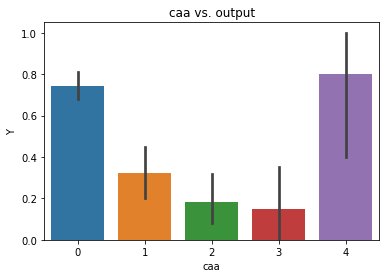

In [178]:
#Caa factor
sns.barplot(data["caa"], Y)
plt.title("caa vs. output")
plt.xlabel("caa")
plt.ylabel("Y")
plt.show()

people whose their caa=4 are more on risk.

/home/amirali/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


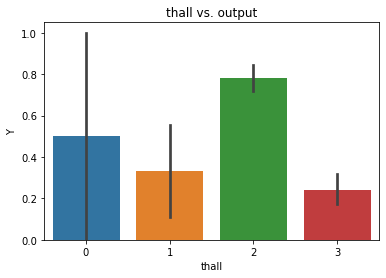

In [179]:
#Thall factor
sns.barplot(data["thall"], Y)
plt.title("thall vs. output")
plt.xlabel("thall")
plt.ylabel("Y")
plt.show()

people with thall=2 group are more likely ti have heart attack.


# TRAIN & TEST

In [180]:

predictors = data.drop("output",axis=1)
target = data["output"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

# * Now we start modeling our problem with ways that we learned.


# KNN ( k - nearest neighbors):

In [181]:
# We test K from 1 to 10 to find which one accuracy is best for our problem.
best_k = 0
best_accuracy = 0

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred_knn = knn.predict(X_test)
    accuracy = accuracy_score(Y_pred_knn, Y_test) * 100
    print(f"Accuracy for K = {k}: {accuracy:.2f}%")
    
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

print(f"\nBest K: {best_k}, Best Accuracy: {best_accuracy:.2f}%")


Accuracy for K = 1: 52.46%
Accuracy for K = 2: 60.66%
Accuracy for K = 3: 63.93%
Accuracy for K = 4: 63.93%
Accuracy for K = 5: 63.93%
Accuracy for K = 6: 65.57%
Accuracy for K = 7: 67.21%
Accuracy for K = 8: 68.85%
Accuracy for K = 9: 67.21%
Accuracy for K = 10: 65.57%

Best K: 8, Best Accuracy: 68.85%


# Decision Tree:

In [182]:
max_accuracy = 0
best_random_state = 0

for random_state in range(200):
    dt = DecisionTreeClassifier(random_state=random_state)
    dt.fit(X_train, Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt, Y_test) * 100, 2)
    if current_accuracy > max_accuracy:
        max_accuracy = current_accuracy
        best_random_state = random_state

dt_best = DecisionTreeClassifier(random_state=best_random_state)
dt_best.fit(X_train, Y_train)
Y_pred_dt_best = dt_best.predict(X_test)
score_dt_best = round(accuracy_score(Y_pred_dt_best, Y_test) * 100, 2)

print("The best random_state for Decision Tree: ", best_random_state)
print("The accuracy for using  Decision Tree is: ", score_dt_best, "%")


The best random_state for Decision Tree:  11
The accuracy for using  Decision Tree is:  81.97 %


# Logistic Regression:

In [183]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr, Y_test) * 100, 2)

print("The accuracy for using Logistic Regression is: ", score_lr, "%")

The accuracy for using Logistic Regression is:  85.25 %


/home/amirali/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM (Support Vector Machine):

We use 5 ways (The methods mentioned by JADI in the class) for SVM to find out which one works better.

In [184]:
# Linear kernel
sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)
score_svm = round(accuracy_score(Y_pred_svm, Y_test) * 100, 2)

print("The accuracy using Linear SVM is:", score_svm, "%")


The accuracy using Linear SVM is: 81.97 %


In [185]:
# Set the desired hyperparameters for the polynomial kernel
degree = 3  # The degree of the polynomial kernel function
gamma = 'scale'  # The kernel coefficient for poly
coef0 = 0.0  # Independent term in the polynomial kernel function

sv_poly = svm.SVC(kernel='poly', degree=degree, gamma=gamma, coef0=coef0)
sv_poly.fit(X_train, Y_train)
Y_pred_svm_poly = sv_poly.predict(X_test)
score_svm_poly = round(accuracy_score(Y_pred_svm_poly, Y_test) * 100, 2)

print("The accuracy using Polynomial SVM is:", score_svm_poly, "%")


The accuracy using Polynomial SVM is: 72.13 %


In [186]:
# Set the desired value for the gamma parameter
gamma_value = 0.1  # You can experiment with different gamma values

sv_rbf = svm.SVC(kernel='rbf', gamma=gamma_value)
sv_rbf.fit(X_train, Y_train)
Y_pred_svm_rbf = sv_rbf.predict(X_test)
score_svm_rbf = round(accuracy_score(Y_pred_svm_rbf, Y_test) * 100, 2)

print("TThe accuracy using RBF SVM is:", score_svm_rbf, "%")


TThe accuracy using RBF SVM is: 55.74 %


In [187]:
# Set the desired values for the gamma and coef0 parameters
gamma_value = 0.1  # You can experiment with different gamma values
coef0_value = 0.0  # You can experiment with different coef0 values

sv_sigmoid = svm.SVC(kernel='sigmoid', gamma=gamma_value, coef0=coef0_value)
sv_sigmoid.fit(X_train, Y_train)
Y_pred_svm_sigmoid = sv_sigmoid.predict(X_test)
score_svm_sigmoid = round(accuracy_score(Y_pred_svm_sigmoid, Y_test) * 100, 2)

print("The accuracy using Sigmoid SVM is:", score_svm_sigmoid, "%")


The accuracy using Sigmoid SVM is: 55.74 %


For SVM methode we find that linear way has the best accuracy!

# Final Conclusion:

**Best Accuracy for each method:**

KNN: 68.85% 

Descision Tree: 81.97 %

Logistic Reg: 85.25 %

SVM:81.97 % (linear)

so the rating for this question will be like :
    
Logistic Reg > Descision Tree = SVM >  KNN